In [1]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 40.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.1/163.1 kB 10.2 MB/s eta 0:00:00
Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=819466 sha256=b90d837ae956a4d140949751a3a422a814e429beb115ea542f81c98c26a374d8
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cyt

In [2]:
from bertopic import BERTopic

2024-03-23 05:28:30.091652: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 05:28:30.091772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 05:28:30.221114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("/kaggle/input/topic-modeling-1/final_data (1).csv",encoding='ISO-8859-1', on_bad_lines="skip",engine="python")
df.shape

(21749, 8)

In [5]:
df

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,256a0dd8edfe03e0aa5c72a347651f4dff8068f3,10.3389/fnut.2021.727548,NaN,"In the past 50 years, the world has seen a dra...","Hoteit, Maha. Zoghbi, Edwina. Rady, Alissar...",Assessment of Industrially Produced Trans<br>...,Front Nutr,Not provided.
1,5c17eca0e4fc83d345681775fa41b57f1ca6c3be,10.1186/s13054-020-03136-6,NaN,ICU. The NuDesc score is approved and shows a ...,"JÃ¤ckel, Markus. Bemtgen, Xavier. <br>Wengen...",Is delirium a specific complication of viral<...,Crit Care,Not provided.
2,5203dba131399e2c7e7b98a57524d92d40648944,10.3389/fnut.2020.583080,NaN,"Since December 2019, the coronavirus disease (...","Tsoupras, Alexandros. Lordan, Ronan. <br>Zab...",Thrombosis and COVID-19: The Potential Role o...,Front Nutr,Not provided.
3,4ac2fe75e88e16b9d97c10f3a89e38f0b2c658ae,10.1530/ec-20-0567,Objective: COVID-19 in people with diabetes is...,People with diabetes are disproportionately af...,"Kempegowda, Punith. Melson, Eka. Johnson,<b...",Effect of COVID-19 on the clinical course of<...,Endocr Connect,Objective: COVID-19 in people with diabetes i...
4,2ed4902c047c625c9b2284d5cf239fe8695ff011,10.3201/eid2706.210135,NaN,T he government of South Korea has implemented...,"Yum, Sujin. Hong, Kwan. Sohn, Sangho. Kim,...",Trends in Viral Respiratory Infections During...,Emerg Infect Dis,Not provided.
...,...,...,...,...,...,...,...,...
21744,3a5089d9a18cad2365666fe8af22f757d92d91b5,10.3390/cells11101648,"Citation: Kirchenwitz, M.; Stahnke, S.; Pretti...",Autophagy is an evolutionarily highly conserve...,"Kirchenwitz, Marco. Stahnke, Stephanie. <br>...",SMER28 Attenuates PI3K/mTOR Signaling by<br>D...,Cells,"Citation: Kirchenwitz, M.; Stahnke, S.;<br>Pr..."
21745,f3be35e7c80726ed84fd072197d5ec6d31e3467e,10.1101/2020.05.03.074914,Neutralizing antibody is one of the most effec...,Coronavirus disease 2019 (COVID-19) is a world...,"Liu, Xiaoyu. Gao, Fang. Gou, Liming. Chen,...",Neutralizing Antibodies Isolated by a<br>site...,bioRxiv,Neutralizing antibody is one of the most<br>e...
21746,8075cb65798163ccf981b2858cf3d18ce61a7759,10.1111/jcal.12601,Background: Virtual reality can be a useful su...,"However, the study revealed a statistical diff...","Liu, Yingjie. Butzlaff, Alice",Where's the germs? The effects of using virtu...,J Comput Assist Learn,Background: Virtual reality can be a useful<b...
21747,fcddd691371921160a622941796a545d3b341863,10.31557/apjcp.2021.22.2.413,NaN,"However, cervical cancer screening remains the...","Joshi, Smita. Muwonge, Richard. Kulkarni,<b...",Mobile Screening Unit (MSU) for the<br>Implem...,Asian Pac J Cancer Prev,Not provided.


In [6]:
df.isnull().sum()

paper_id               2
doi                 2411
abstract            6996
body_text           4620
authors             5842
title               6696
journal             8624
abstract_summary    8219
dtype: int64

In [7]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8778 entries, 3 to 21748
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          8778 non-null   object
 1   doi               8778 non-null   object
 2   abstract          8778 non-null   object
 3   body_text         8778 non-null   object
 4   authors           8778 non-null   object
 5   title             8778 non-null   object
 6   journal           8778 non-null   object
 7   abstract_summary  8778 non-null   object
dtypes: object(8)
memory usage: 617.2+ KB


In [8]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=e2769d6685096c9614d5b3fd4503ca6c3958b3d61b2107edca8b4db312de46e0
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [9]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['body_text'].split(" ")

    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:

            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass

    # get the language
    languages.append(lang)

100%|██████████| 8778/8778 [01:11<00:00, 123.21it/s]


In [10]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)

print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 8778

{'af': 1,
 'ca': 6,
 'cy': 6,
 'da': 6,
 'de': 64,
 'en': 8514,
 'es': 60,
 'et': 3,
 'fi': 1,
 'fr': 30,
 'hr': 3,
 'id': 5,
 'it': 22,
 'lt': 2,
 'lv': 3,
 'nl': 11,
 'no': 5,
 'pl': 1,
 'pt': 7,
 'ro': 11,
 'sl': 1,
 'so': 1,
 'sq': 2,
 'sw': 3,
 'tl': 7,
 'tr': 3}


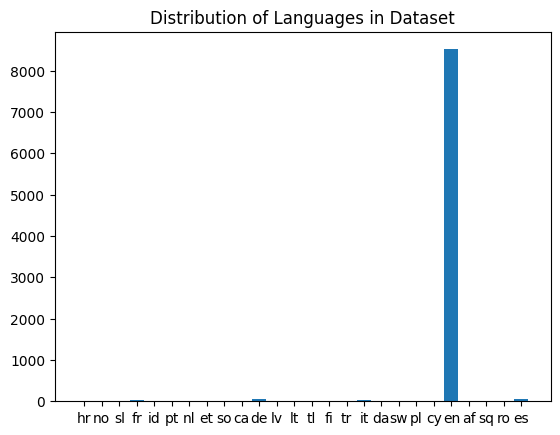

In [11]:
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [12]:
df.shape

(8778, 9)

In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [14]:
df = df[df['language'] == 'en']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8514 entries, 3 to 21748
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   paper_id          8514 non-null   object
 1   doi               8514 non-null   object
 2   abstract          8514 non-null   object
 3   body_text         8514 non-null   object
 4   authors           8514 non-null   object
 5   title             8514 non-null   object
 6   journal           8514 non-null   object
 7   abstract_summary  8514 non-null   object
 8   language          8514 non-null   object
dtypes: object(9)
memory usage: 665.2+ KB


In [15]:
df.shape

(8514, 9)

In [16]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_text(text):
    # Define additional stop words
    additional_stopwords = ['ha', 'le', 'wa','doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure',
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.',
    'al.', 'Elsevier', 'PMC', 'CZI']

    # Get NLTK's default English stopwords
    default_stopwords = set(stopwords.words('english'))

    # Combine additional and default stopwords
    all_stopwords = set(additional_stopwords) | default_stopwords

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)

    # Lowercase the text
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuation])

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove numerical values and single characters
    tokens = [word for word in tokens if not word.isdigit() and len(word) > 1]

    # Remove stopwords
    tokens = [word for word in tokens if word not in all_stopwords]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


# Sample text
sample_text = "Objective: COVID-19 in people with diabetes is<br>associated with a disproportionately worse prognosis.<br>DKA is an acute complication of diabetes with a<br>mortality rate of approximately 0.67%. Little is known<br>about the natural history of DKA in the presence of<br>COVID-19. This study aimed to explore the effects of<br>COVID-19 on presentation, clinical course and outcome<br>in patients presenting with DKA. Design:<br>Retrospective cohort study. Methods: All patients treated<br>for DKA between 1 March 2020 and 30 May 2020 were<br>included. Patients were categorised as COVID-positive<br>or COVID-negative based on the swab test. A<br>pre-COVID group was established using data..."

# Preprocess the sample text
preprocessed_sample_text = preprocess_text(sample_text)
print(preprocessed_sample_text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
objective covid19 people diabetes associated disproportionately worse prognosis dka acute complication diabetes mortality rate approximately little known natural history dka presence covid19 study aimed explore effects covid19 presentation clinical course outcome patients present

In [17]:
# Define a function to apply preprocessing to each row of the DataFrame
def preprocess_row(row):
    abstract = row['abstract_summary']
    preprocessed_abstract = preprocess_text(abstract)
    return preprocessed_abstract

# Apply preprocessing to the 'abstract_summary' column
df['abstract_summary_cleaned'] = df.apply(preprocess_row, axis=1)

# Print the first few rows to verify the result
print(df['abstract_summary_cleaned'].head())

3     objective covid19 people diabetes associated d...
6     please cite article il calandri hawkes marroda...
10    background media use may influence metabolic s...
12    background vaccine hesitancy global threat und...
14    citation kolariä jukiä bren novel smallmolec...
Name: abstract_summary_cleaned, dtype: object


In [18]:
tweets = df.abstract_summary_cleaned.to_list()
topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(tweets)

2024-03-23 05:30:35,716 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/267 [00:00<?, ?it/s]

2024-03-23 05:30:53,128 - BERTopic - Embedding - Completed ✓
2024-03-23 05:30:53,129 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-23 05:31:24,093 - BERTopic - Dimensionality - Completed ✓
2024-03-23 05:31:24,094 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-23 05:31:24,504 - BERTopic - Cluster - Completed ✓
2024-03-23 05:31:24,510 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-23 05:31:25,806 - BERTopic - Representation - Completed ✓


In [19]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3545,-1_patients_health_covid19_study,"[patients, health, covid19, study, pandemic, d...",[effects covid19 male female fertility uncerta...
1,0,245,0_students_learning_education_teaching,"[students, learning, education, teaching, onli...",[background covid19 pandemic reason revise tra...
2,1,210,1_mental_depression_anxiety_psychological,"[mental, depression, anxiety, psychological, s...",[purpose evaluate impact covid19 pandemic cana...
3,2,144,2_tourism_sustainable_energy_economic,"[tourism, sustainable, energy, economic, emiss...",[urbanization concomitant challenges pose grea...
4,3,129,3_vaccine_vaccination_vaccines_hesitancy,"[vaccine, vaccination, vaccines, hesitancy, ac...",[objectives new coronavirus identified many ef...
...,...,...,...,...,...
137,136,11,136_athletes_sports_exercise_gh,"[athletes, sports, exercise, gh, ehs, collegia...",[background covid19 global pandemic caused com...
138,137,11,137_version_file_disclaimers_pertain,"[version, file, disclaimers, pertain, copyedit...",[pdf file article undergone enhancements accep...
139,138,10,138_nothing_declare_wuhan_epidemiological,"[nothing, declare, wuhan, epidemiological, pat...",[prolonged presence viral nucleic acid reporte...
140,139,10,139_ubiquitin_proteasome_proteases_iga1,"[ubiquitin, proteasome, proteases, iga1, enzym...",[iga1 proteases proteolytic enzymes cleave spe...


In [20]:
topic_model.visualize_topics()

# PLSA

In [21]:
from gensim import corpora, models

# Tokenize the preprocessed text
tokenized_text = [doc.split() for doc in df['abstract_summary_cleaned']]

# Create a dictionary mapping of words and their integer ids
dictionary = corpora.Dictionary(tokenized_text)

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Train the LSI model
lsi_model = models.LsiModel(corpus, id2word=dictionary, num_topics=7)  # You can adjust num_topics as needed

# Get the topics
topics = lsi_model.show_topics()

# # Print the topics
# for topic in topics:
#     print(topic)
# Print only keywords in each topic
for topic_id, topic in topics:
    words = [word.split('*')[1].strip().strip('"') for word in topic.split('+')]
    print(f"Topic {topic_id}: {' '.join(words)}")

Topic 0: covid19 patients study disease pandemic sarscov2 health coronavirus infection respiratory
Topic 1: â sarscov2 patients covid19 respiratory ø§ù virus coronavirus infection acute
Topic 2: patients sarscov2 â respiratory virus coronavirus infection covid19 viral acute
Topic 3: patients health pandemic sarscov2 covid19 respiratory study severe acute social
Topic 4: covid19 study health pandemic patients data methods background sarscov2 coronavirus
Topic 5: health study patients care covid19 public data respiratory coronavirus acute
Topic 6: sarscov2 study virus disease cells human viral diseases cell viruses


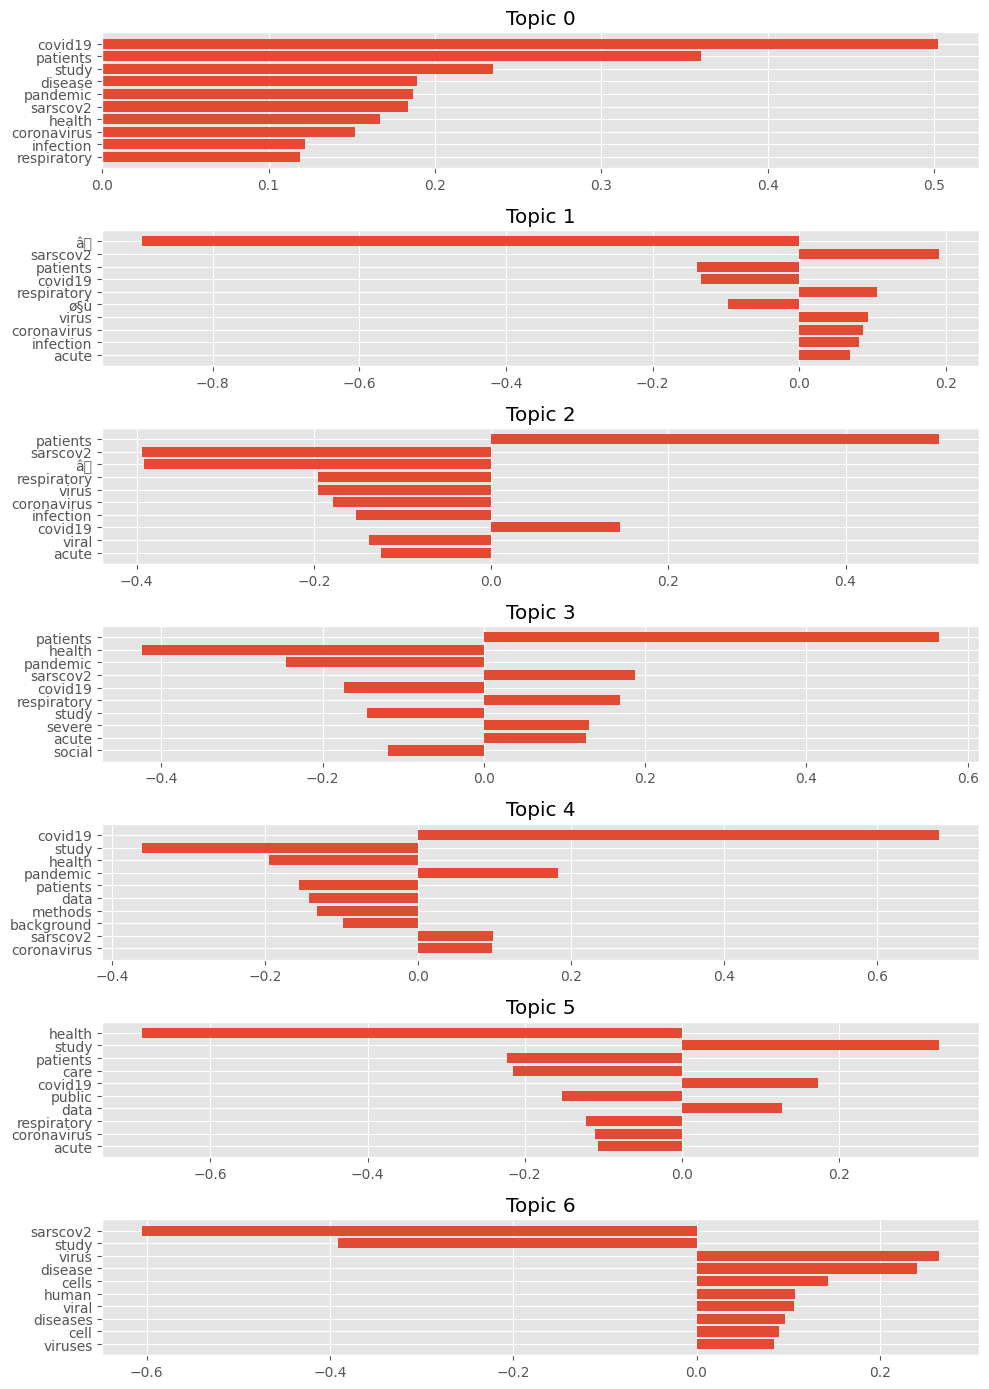

In [22]:
import matplotlib.pyplot as plt

# Get the topics and their word distributions
topics = lsi_model.show_topics()

# Plot the word distributions for each topic
num_words = 10  # Number of words to display per topic
num_topics = len(topics)

fig, axs = plt.subplots(num_topics, figsize=(10, num_topics * 2))
fig.subplots_adjust(hspace=0.5)

for i, (topic_id, topic) in enumerate(topics):
    words = [word.split('*')[1].strip().strip('"') for word in topic.split('+')]
    word_probs = [float(word.split('*')[0]) for word in topic.split('+')]
    
    axs[i].barh(range(num_words), word_probs[:num_words], align='center')
    axs[i].set_yticks(range(num_words))
    axs[i].set_yticklabels(words[:num_words])
    axs[i].invert_yaxis()
    axs[i].set_title(f'Topic {topic_id}')

plt.tight_layout()
plt.show()



# CTM

In [23]:
!pip install tomotopy


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 17.2 MB/s eta 0:00:0000:0100:01


In [24]:
import tomotopy as tp

# Create a CTM model
ctm_model = tp.CTModel(k=7)

# Train the CTM model
for doc in tokenized_text:
    ctm_model.add_doc(doc)

ctm_model.train(0)  # Initialize variational parameters
for i in range(1000):
    ctm_model.train(1)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, ctm_model.ll_per_word))




Iteration: 0	Log-likelihood: -9.230857784045437
Iteration: 1	Log-likelihood: -8.984386294810898
Iteration: 2	Log-likelihood: -8.87416814419217
Iteration: 3	Log-likelihood: -8.75042333733774
Iteration: 4	Log-likelihood: -8.680935505543104
Iteration: 5	Log-likelihood: -8.593658758438876
Iteration: 6	Log-likelihood: -8.539879828862064
Iteration: 7	Log-likelihood: -8.474258770407966
Iteration: 8	Log-likelihood: -8.433183613408428
Iteration: 9	Log-likelihood: -8.377003249497829
Iteration: 10	Log-likelihood: -8.345183882759052
Iteration: 11	Log-likelihood: -8.301685755838804
Iteration: 12	Log-likelihood: -8.27499082641464
Iteration: 13	Log-likelihood: -8.238189486006732
Iteration: 14	Log-likelihood: -8.215082134235859
Iteration: 15	Log-likelihood: -8.184711414582216
Iteration: 16	Log-likelihood: -8.161942566388616
Iteration: 17	Log-likelihood: -8.132493862954611
Iteration: 18	Log-likelihood: -8.114675336970508
Iteration: 19	Log-likelihood: -8.085969699036669
Iteration: 20	Log-likelihood: -8.

In [25]:
# Get the topics
topics = [ctm_model.get_topic_words(topic_id, top_n=10) for topic_id in range(ctm_model.k)]

# Print the topics
for topic_id, topic in enumerate(topics):
    words = [word for word, _ in topic]
    print(f"Topic {topic_id}: {' '.join(words)}")


Topic 0: patients respiratory disease acute clinical symptoms severe syndrome patient treatment
Topic 1: model paper learning research data based systems approach information models
Topic 2: viral sarscov2 cells virus protein respiratory cell infection viruses rna
Topic 3: health pandemic care social public healthcare students survey medical online
Topic 4: coronavirus disease sarscov2 potential novel diseases virus role new vaccine
Topic 5: covid19 study methods data background results may risk factors cases
Topic 6: however studies infection pandemic analysis two also including review different


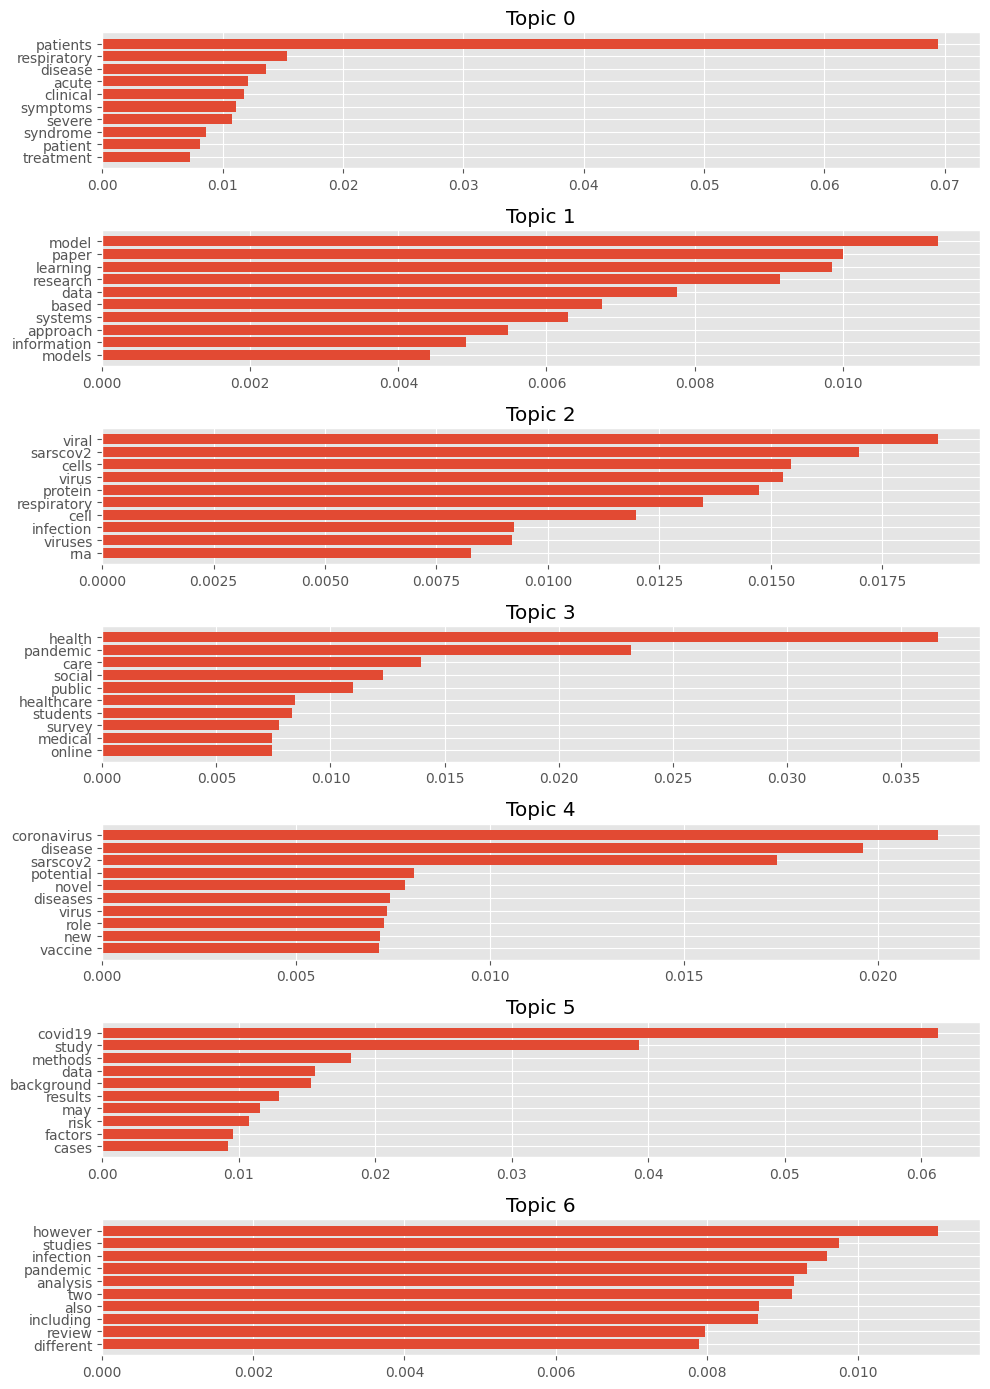

In [26]:
import matplotlib.pyplot as plt

# Get the topics and their word distributions
topics = [ctm_model.get_topic_words(topic_id, top_n=10) for topic_id in range(ctm_model.k)]

# Plot the word distributions for each topic
num_words = 10  # Number of words to display per topic
num_topics = len(topics)

fig, axs = plt.subplots(num_topics, figsize=(10, num_topics * 2))
fig.subplots_adjust(hspace=0.5)

for i, topic in enumerate(topics):
    words = [word for word, _ in topic]
    word_probs = [prob for _, prob in topic]
    
    axs[i].barh(range(num_words), word_probs, align='center')
    axs[i].set_yticks(range(num_words))
    axs[i].set_yticklabels(words)
    axs[i].invert_yaxis()
    axs[i].set_title(f'Topic {i}')

plt.tight_layout()
plt.show()
